# Billy Bondlli Analysis

## Import data and begin formatting it

I combined the SD global data into the dataset seperately using excel and another python notebook. It was too cumbersome to do using one Python notebook. 

In [30]:
# Import necessary packages

import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [11]:
# Import data

data = pd.read_csv('data.csv', low_memory = False)
data.head()

,Array Name,Date/Time,Energy Produced (Wh),SD_global_radiance
0,1,7/2/21,7702,88708.8
1,1,7/3/21,6123,76321.2
2,1,7/4/21,6809,82492.8
3,1,7/5/21,7588,91858.8
4,1,7/6/21,7601,92270.4


In [12]:
# Date/Time column is currently an object

data.dtypes

Array Name                int64
Date/Time                object
Energy Produced (Wh)      int64
SD_global_radiance      float64
dtype: object

In [13]:
# Convert dates to date format

data['Date/Time'] = pd.to_datetime(data['Date/Time'], format = '%m/%d/%y')


In [14]:
# Change solar arrays to numbers

dict = {'mp1':1, 'mp2':2, 'mp3':3}
data = data.replace({'Array Name':dict})


In [15]:
# Create a new column called 'Energy Produced (kWh)'

data['Energy Produced (kWh)'] = data['Energy Produced (Wh)']/1000

In [16]:
# Create dataframe slice that contains only data from July 1, 2021 to June 30, 2022

dataS = data[(data['Date/Time'] > '2021-7-1') & (data['Date/Time'] <= '2022-6-30')]
dataS

dataS.to_csv('dataClean.csv')


In [17]:
# Create three new dataframe slices for each solar array

dataS1 = dataS[(dataS['Array Name'] <= 1)]
dataS2 = dataS[(dataS['Array Name'] >= 1.5) & (dataS['Array Name'] <= 2.5)]
dataS3 = dataS[(dataS['Array Name'] >= 3)]

## Check for outliers/errors

In [22]:
dataS1.describe()

# There are no values where Energy Produced (kWhh) is negative or > 50 for array 1

,Array Name,Energy Produced (Wh),SD_global_radiance,Energy Produced (kWh)
count,364.0,364.000000,364.000000,364.000000
mean,1.0,5239.197802,64327.486813,5.239198
std,0.0,1744.376844,22185.845176,1.744377
min,1.0,466.000000,4413.600000,0.466000
25%,1.0,3809.750000,45490.200000,3.809750
50%,1.0,5310.500000,66578.400000,5.310500
75%,1.0,6736.250000,84360.300000,6.736250
max,1.0,8079.000000,101130.000000,8.079000


In [23]:
dataS2.describe()

# There are no values where Energy Produced (kWhh) is negative or > 50 for array 2

,Array Name,Energy Produced (Wh),SD_global_radiance,Energy Produced (kWh)
count,364.0,364.000000,364.000000,364.000000
mean,2.0,16899.711538,64327.486813,16.899712
std,0.0,3827.513475,22185.845176,3.827513
min,2.0,1495.000000,4413.600000,1.495000
25%,2.0,15008.250000,45490.200000,15.008250
50%,2.0,17601.500000,66578.400000,17.601500
75%,2.0,19875.250000,84360.300000,19.875250
max,2.0,21813.000000,101130.000000,21.813000


In [24]:
dataS3.describe()

# There are no values where Energy Produced (kWhh) is negative or > 50 for array 1

,Array Name,Energy Produced (Wh),SD_global_radiance,Energy Produced (kWh)
count,364.0,364.000000,364.000000,364.000000
mean,3.0,8490.793956,64327.486813,8.490794
std,0.0,1929.649683,22185.845176,1.929650
min,3.0,769.000000,4413.600000,0.769000
25%,3.0,7554.250000,45490.200000,7.554250
50%,3.0,8845.000000,66578.400000,8.845000
75%,3.0,9966.250000,84360.300000,9.966250
max,3.0,10952.000000,101130.000000,10.952000


## Check correlations and create linear models for each array

In [28]:
# Check correlation between Energy Produced (kWh) and SD Global Radiance for array 1

predictors = ['SD_global_radiance']
outcome = 'Energy Produced (kWh)'

model = sm.OLS(dataS1[outcome], dataS1[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Energy Produced (kWh)   R-squared:                       0.725
Model:                               OLS   Adj. R-squared:                  0.725
Method:                    Least Squares   F-statistic:                     956.7
Date:                   Mon, 26 Sep 2022   Prob (F-statistic):          1.18e-103
Time:                           20:35:08   Log-Likelihood:                -483.24
No. Observations:                    364   AIC:                             970.5
Df Residuals:                        362   BIC:                             978.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
SD_global_radiance  6.697e-05   2.17e-06     30.930      0.000    6.27e-05    7.12e-05
const                  0.9312      0.147      6.321      0.000       0.642       1.221
==============================================================================
Omnibus:                       35.247   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.705
Skew:                           0.451   Prob(JB):                     1.22e-20
Kurtosis:                       5.287   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

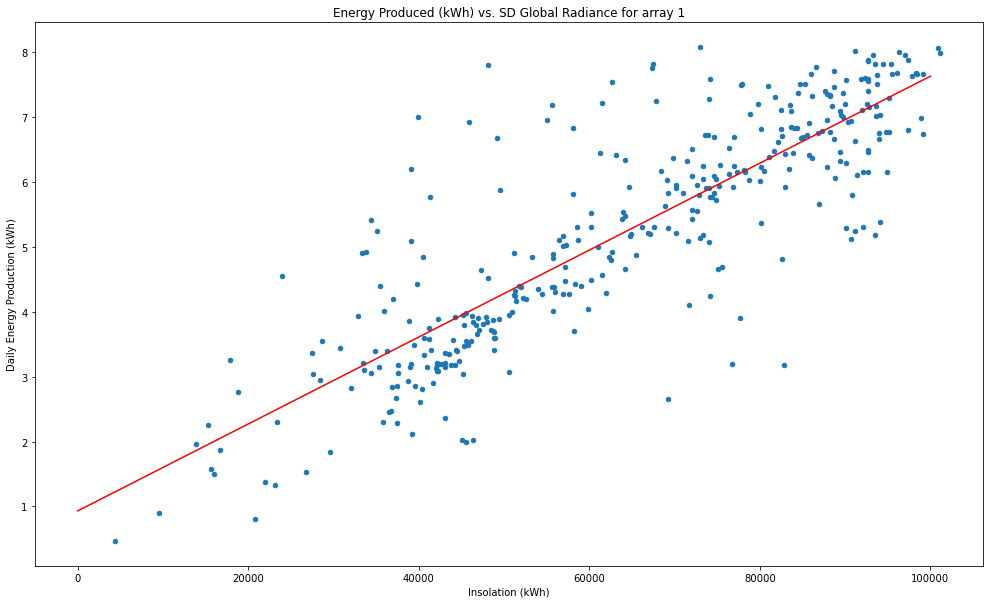

In [34]:
# Graph Energy Produced (kWh) vs. SD Global Radiance for array 1 with best fit line

dataS1.plot( x = 'SD_global_radiance', 
            y = 'Energy Produced (kWh)', 
            kind = 'scatter',
            title = 'Energy Produced (kWh) vs. SD Global Radiance for array 1',
            xlabel = 'Insolation (kWh)',
            ylabel = 'Daily Energy Production (kWh)', 
            s = 20, 
            figsize=(17,10))

x = np.array(range(100000))
y = (6.697e-05)*x + (0.9312)
plt.plot(x,y, color = 'red')
plt.show()


In [36]:
# Check correlation between Energy Produced (kWh) and SD Global Radiance for array 2

predictors = ['SD_global_radiance']
outcome = 'Energy Produced (kWh)'

model = sm.OLS(dataS2[outcome], dataS2[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Energy Produced (kWh)   R-squared:                       0.561
Model:                               OLS   Adj. R-squared:                  0.560
Method:                    Least Squares   F-statistic:                     463.3
Date:                   Mon, 26 Sep 2022   Prob (F-statistic):           9.15e-67
Time:                           20:39:03   Log-Likelihood:                -854.56
No. Observations:                    364   AIC:                             1713.
Df Residuals:                        362   BIC:                             1721.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
SD_global_radiance     0.0001   6.01e-06     21.526      0.000       0.000       0.000
const                  8.5845      0.409     21.011      0.000       7.781       9.388
==============================================================================
Omnibus:                       89.456   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.812
Skew:                          -1.230   Prob(JB):                     5.53e-45
Kurtosis:                       5.719   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

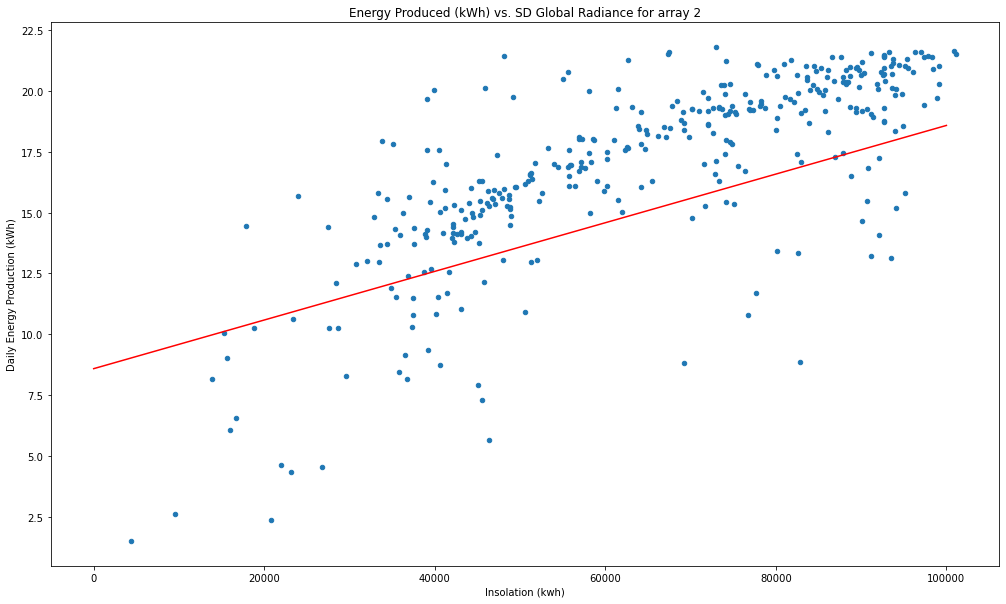

In [37]:
# Graph Energy Produced (kWh) vs. SD Global Radiance for array 2

dataS2.plot( x = 'SD_global_radiance', 
            y = 'Energy Produced (kWh)', 
            kind = 'scatter',
            title = 'Energy Produced (kWh) vs. SD Global Radiance for array 2',
            xlabel = 'Insolation (kwh)',
            ylabel = 'Daily Energy Production (kWh)', 
            s = 20, 
            figsize=(17,10))

x = np.array(range(100000))
y = (0.0001)*x + (8.5845)
plt.plot(x,y, color = 'red')
plt.show()


In [38]:
# Check correlation between Energy Produced (kWh) and SD Global Radiance for array 3

predictors = ['SD_global_radiance']
outcome = 'Energy Produced (kWh)'

model = sm.OLS(dataS3[outcome], dataS3[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Energy Produced (kWh)   R-squared:                       0.567
Model:                               OLS   Adj. R-squared:                  0.566
Method:                    Least Squares   F-statistic:                     473.9
Date:                   Mon, 26 Sep 2022   Prob (F-statistic):           9.16e-68
Time:                           20:39:55   Log-Likelihood:                -602.96
No. Observations:                    364   AIC:                             1210.
Df Residuals:                        362   BIC:                             1218.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
SD_global_radiance  6.549e-05   3.01e-06     21.769      0.000    5.96e-05    7.14e-05
const                  4.2781      0.205     20.902      0.000       3.876       4.681
==============================================================================
Omnibus:                       88.454   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.538
Skew:                          -1.206   Prob(JB):                     2.33e-45
Kurtosis:                       5.780   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

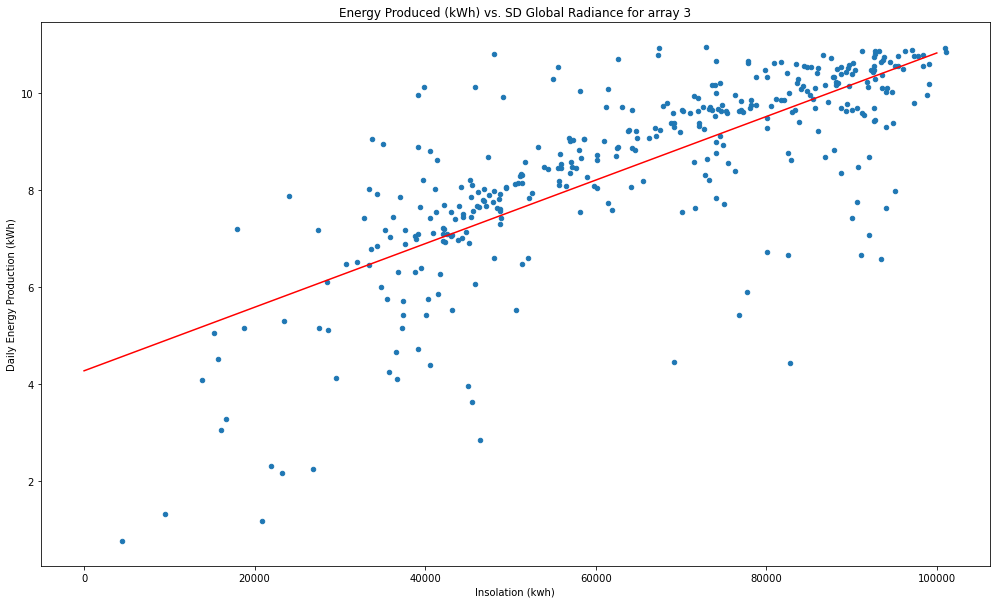

In [39]:
# Graph Energy Produced (kWh) vs. SD Global Radiance for array 3

dataS3.plot( x = 'SD_global_radiance', 
            y = 'Energy Produced (kWh)', 
            kind = 'scatter',
            title = 'Energy Produced (kWh) vs. SD Global Radiance for array 3',
            xlabel = 'Insolation (kwh)',
            ylabel = 'Daily Energy Production (kWh)', 
            s = 20, 
            figsize=(17,10))

x = np.array(range(100000))
y = (6.549e-05)*x + (4.2781)
plt.plot(x,y, color = 'red')
plt.show()